## AML End Term
## Name : Kandarp Chaudhary &amp; Sahil Gupta
## Roll no. : D21016 &amp; D21030

### Problem Statement:

<div style="text-align: justify">It is the year 2022 and we are at the verge of a massive climatic change. With global warming at its peak and fossil fuels inching towards its extinction, it is the need of the hour to step up and take responsibility for our planet. Developing countries all over the world are making a shift towards a cleaner energy source and are looking at ways to expand their global energy source power.</div>

<div style="text-align: justify">Switching to renewable energy sources is a great way to reduce dependency on imported fuels and increase cost efficiency. It is time we move towards a low-carbon future by embracing solar, hydro, geothermal energy and so on, to protect mother nature.</div>

<div style="text-align: justify">An efficient energy source that has been gaining popularity around the world is wind turbines. Wind turbines generate power by capturing the kinetic energy of the wind. Factors such as temperature, wind direction, turbine status, weather, blade length, and so on influence the amount of power generated.</div>

https://www.hackerearth.com/challenges/competitive/hackerearth-machine-learning-challenge-predict-windmill-power/

### Objective:

<div style="text-align: justify">The objective is to build a sophisticated Machine Learning model that predicts the power that is generated (in KW/h) based on the various features provided in the dataset. To analyze and implement multiple algorithms and determine which is more appropriate for a problem To get hands-on experience in Machine Learning problems.</div>

### Problem solving approach:

####  Train-test split : Splitting the data into train and test in 80:20 ratio.


1. <div style="text-align: justify">Questioning the data - Understanding the variables very carefully and formulating
questions/hypothesis. (Note : These are just initial hypothesis which may or may not seem to be
true after the EDA step.)</div>
2. <div style="text-align: justify">EDA - Exploring the dataset very carefully by doing univariate analysis and bivariate analysis by choosing appropriate graphs, charts and descriptive measures. Reporting the surprising elements (i.e. the one which were believed would be true in step 1 did not turn out to be true, or a result that was beyond expectation, etc.)</div>
3. <div style="text-align: justify">Missing value imputation using various methods such as mean,median or KNN imputation
</div>
4. <div style="text-align: justify">Feature engineering - (A) Suggesting some possible feature transformations (like log(X), sqrt(X), X^2, X1*X2, etc.) with reasons. Feature engineering - (B) Suggesting some new feature generation techniques (e.g.: creating
dummy variables, or using one-hot encoding, or transforming an existing feature to a new feature).</div>
5. <div style="text-align: justify">Initial model fitting step - Fitting a couple of linear regression models by considering different sets of predictors on the training dataset. Argue the reasons for considering those predictor sets.
Reporting k-fold cross-validation MAE, RMSE, R-squared and adjusted R-squared values.</div>
6. <div style="text-align: justify">Advanced model fitting step - Using model selection methods (like forward selection or
backward elimination methods) to select an appropriate model.</div>
7. <div style="text-align: justify">Final model fitting step - Experiment and check if a decision tree model or Random Forest can be used to fit the data more accurately. Use any kind of hyperparameter tuning to fit the model. Experiment using all the feature sets created before (including all the transformed sets and new feature-generated sets).</div>
8. <div style="text-align: justify">Model testing - Consider the best competing models and test their performances on the test data. Reporting the results.</div>

In [1]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>
#Code to left align Markdown tables

### Attribute Information :

|Column Name                       |Meaning|
|:---------------------------------|:------|
|tracking_id                       |ID of the Wind Turbine|
|datetime                          |Date and Time|
|wind_speed(m/s)                   |Speed of wind in m/s|
|atmospheric_temperature(°C)       |Atmospheric temperature in degree Celcius|
|shaft_temperature(°C)             |Wind Mill shaft temperature in degree Celcius |
|blades_angle(°)                   |Angle of blades in degree|
|gearbox_temperature(°C)           |Gear box temperature in degree Celcius|
|engine_temperature(°C)            |Engine temperature in degree Celcius|
|motor_torque(N-m)                 |Torque of Motor in N.m |
|generator_temperature(°C)         |Generator temperature in degree Celcius|
|atmospheric_pressure(Pascal)      |Atmospheric Pressure in Pascal|
|area_temperature(°C)              |Area temperature in degree Celcius|
|windmill_body_temperature(°C)     |Wind Mill body temperature in degree Celcius|
|wind_direction(°)                 |Wind direction in degree|
|resistance(ohm)                   |Winding resistance in Ohm|
|rotor_torque(N-m)                 |Rotor torque in N.m|
|turbine_status                    |Turbine Status(AAA, A2, AB, AC, A, ABC, BBB, BA, BB, B2, BCB, BD, B, D)|
|cloud_level                       |Cloud Level (Extremely Low, Low, Medium)|
|blade_length(m)                   |Length of blades in m|
|blade_breadth(m)                  |Bredth of blades in m|
|windmill_height(m)                |Height of Wind mill in m|
|windmill_generated_power(kW/h)    |Power generated by wind mill in kW/h|

In [2]:
#Importing the necessary Libraries
import pandas as pd                                     #Pandas module mainly works with the tabular data             
import numpy as np                                      #NumPy module works with the numerical data
import seaborn as sns
import matplotlib.pyplot as plt                         #plotting libraries to plot the necessary graphs for EDA
import plotly.express as px                             #plotting libraries to plot the necessary graphs for EDA
import sklearn                                          #importing machine learning libraries
import statsmodels.api as stm   
from sklearn import linear_model
from sklearn.model_selection import cross_val_score     #for cross validation score calculation                       
from sklearn.tree import DecisionTreeRegressor          #for regression using decision tree
from sklearn.metrics import r2_score                    #to calculate R-squared value
from sklearn.metrics import mean_absolute_error                    #to calculate R-squared value
from sklearn.model_selection import train_test_split    #for doing test & train split of data
import sklearn.ensemble as ensemble
import warnings
warnings.filterwarnings("ignore")

### 1) Reading the train data  

In [3]:
train = "https://raw.githubusercontent.com/sahil-gupta16/dataset/main/Windmill_train_clean.csv"
df_train = pd.read_csv(train)                         #reading the cleaned train data from the repositry
df_train.shape                                        #checking the shape of the data

(22394, 23)

In [4]:
df_train.head(2)

,tracking_id,datetime,speed_wind,atmospheric_temperature,shaft_temperature,blades_angle,gearbox_temperature,engine_temperature,motor_torque,generator_temperature,...,direction_wind,resistance,rotor_torque,turbine_status,cloud_level,blade_length,blade_breadth,height_windmill,windmill_generated_power,atmospheric_temperature_imp
0,WM_24537,2019-05-25 12:53:20,1.772478,0.868046,-7.188719,0.141416,40.254733,42.430519,822.481889,38.473050,...,218.229315,1246.371082,13.207233,AB,Low,8.300782,0.381435,26.538651,5.327000,True
1,WM_11995,2019-02-02 12:53:20,9.682917,17.556230,43.230546,14.359578,49.450861,43.948129,2839.818485,92.687648,...,313.837094,1953.054819,47.481954,BB,Medium,3.935231,0.471872,24.945305,13.769339,False


### 2) Reading the test data

In [5]:
test = "https://raw.githubusercontent.com/sahil-gupta16/dataset/main/Windmill_test_clean.csv"
df_test = pd.read_csv(test)                          #reading the cleaned test data from the repositry
df_test.shape                                        #checking the shape of the data

(5599, 23)

In [6]:
df_test.head(2)

,tracking_id,datetime,speed_wind,atmospheric_temperature,shaft_temperature,blades_angle,gearbox_temperature,engine_temperature,motor_torque,generator_temperature,...,direction_wind,resistance,rotor_torque,turbine_status,cloud_level,blade_length,blade_breadth,height_windmill,windmill_generated_power,atmospheric_temperature_imp
0,WM_51,2018-10-29 05:33:20,9.638635,49.323656,14.115891,5.952436,69.517702,43.447832,2859.880400,86.736871,...,152.663492,1976.228314,104.686191,D,Medium,1.216556,0.491366,25.361037,9.29106,True
1,WM_1441,2018-11-11 08:53:20,9.526949,25.834128,5.089377,0.786710,42.013690,41.115060,2040.684223,70.161484,...,271.147652,1698.318235,32.664450,BA,Medium,3.588249,0.357759,26.545724,3.96375,False


In [7]:
df_train.columns                  #listing the colummn names in the training data

Index(['tracking_id', 'datetime', 'speed_wind', 'atmospheric_temperature',
       'shaft_temperature', 'blades_angle', 'gearbox_temperature',
       'engine_temperature', 'motor_torque', 'generator_temperature',
       'atmospheric_pressure', 'area_temperature', 'body_temperature_windmill',
       'direction_wind', 'resistance', 'rotor_torque', 'turbine_status',
       'cloud_level', 'blade_length', 'blade_breadth', 'height_windmill',
       'windmill_generated_power', 'atmospheric_temperature_imp'],
      dtype='object')

In [8]:
df_test.columns                  #listing the colummn names in the testing data

Index(['tracking_id', 'datetime', 'speed_wind', 'atmospheric_temperature',
       'shaft_temperature', 'blades_angle', 'gearbox_temperature',
       'engine_temperature', 'motor_torque', 'generator_temperature',
       'atmospheric_pressure', 'area_temperature', 'body_temperature_windmill',
       'direction_wind', 'resistance', 'rotor_torque', 'turbine_status',
       'cloud_level', 'blade_length', 'blade_breadth', 'height_windmill',
       'windmill_generated_power', 'atmospheric_temperature_imp'],
      dtype='object')

##### atmospheric_temperature_imp column was create during the KNn imputation in R. We drop this column from our dataset

In [9]:
#creating seperate dataframe without tracking_id and datetime columns.
data_train = df_train.drop(columns = ["tracking_id", "datetime","turbine_status","atmospheric_temperature_imp"])
#rearranging the columns in the dataframe
data_train = data_train[['speed_wind', 'atmospheric_temperature', 'shaft_temperature',
       'blades_angle', 'gearbox_temperature', 'engine_temperature',
       'motor_torque', 'generator_temperature', 'atmospheric_pressure',
       'area_temperature', 'body_temperature_windmill', 'direction_wind',
       'resistance', 'rotor_torque', 'blade_length',
       'blade_breadth', 'height_windmill', 'cloud_level', 'windmill_generated_power']]
data_train.head(2)

,speed_wind,atmospheric_temperature,shaft_temperature,blades_angle,gearbox_temperature,engine_temperature,motor_torque,generator_temperature,atmospheric_pressure,area_temperature,body_temperature_windmill,direction_wind,resistance,rotor_torque,blade_length,blade_breadth,height_windmill,cloud_level,windmill_generated_power
0,1.772478,0.868046,-7.188719,0.141416,40.254733,42.430519,822.481889,38.473050,95456.049051,22.861485,42.700917,218.229315,1246.371082,13.207233,8.300782,0.381435,26.538651,Low,5.327000
1,9.682917,17.556230,43.230546,14.359578,49.450861,43.948129,2839.818485,92.687648,94989.383195,37.057648,46.512083,313.837094,1953.054819,47.481954,3.935231,0.471872,24.945305,Medium,13.769339


In [10]:
#creating seperate dataframe without tracking_id and datetime columns.(test datset)
data_test = df_test.drop(columns = ["tracking_id", "datetime","turbine_status","atmospheric_temperature_imp"])
#rearranging the columns in the dataframe
data_test = data_test[['speed_wind', 'atmospheric_temperature', 'shaft_temperature',
       'blades_angle', 'gearbox_temperature', 'engine_temperature',
       'motor_torque', 'generator_temperature', 'atmospheric_pressure',
       'area_temperature', 'body_temperature_windmill', 'direction_wind',
       'resistance', 'rotor_torque', 'blade_length',
       'blade_breadth', 'height_windmill', 'cloud_level', 'windmill_generated_power']]
data_test.head(2)

,speed_wind,atmospheric_temperature,shaft_temperature,blades_angle,gearbox_temperature,engine_temperature,motor_torque,generator_temperature,atmospheric_pressure,area_temperature,body_temperature_windmill,direction_wind,resistance,rotor_torque,blade_length,blade_breadth,height_windmill,cloud_level,windmill_generated_power
0,9.638635,49.323656,14.115891,5.952436,69.517702,43.447832,2859.880400,86.736871,94983.274938,48.767466,43.281459,152.663492,1976.228314,104.686191,1.216556,0.491366,25.361037,Medium,9.29106
1,9.526949,25.834128,5.089377,0.786710,42.013690,41.115060,2040.684223,70.161484,94978.385597,47.591146,43.281459,271.147652,1698.318235,32.664450,3.588249,0.357759,26.545724,Medium,3.96375


In [11]:
data = data_train.copy()             #copying the training data to a new dataframe

In [12]:
data.corr()                          #Finding the correlation between the features

,speed_wind,atmospheric_temperature,shaft_temperature,blades_angle,gearbox_temperature,engine_temperature,motor_torque,generator_temperature,atmospheric_pressure,area_temperature,body_temperature_windmill,direction_wind,resistance,rotor_torque,blade_length,blade_breadth,height_windmill,windmill_generated_power
speed_wind,1.000000,0.327368,0.045923,-0.002996,0.036781,0.163508,0.400452,0.456577,-0.130756,0.214344,0.054874,-0.109364,0.282356,0.202933,0.011380,0.011480,-0.017940,0.067863
atmospheric_temperature,0.327368,1.000000,0.102002,0.020987,0.063555,0.286261,0.504045,0.607709,-0.157088,0.407500,0.121584,-0.226623,0.372349,0.245830,0.012100,-0.004281,-0.004985,0.003126
shaft_temperature,0.045923,0.102002,1.000000,-0.019933,0.070928,0.293558,0.103138,0.109934,-0.026533,0.134266,0.090285,-0.037022,0.062962,0.057792,0.008284,-0.006122,-0.004718,0.064228
blades_angle,-0.002996,0.020987,-0.019933,1.000000,-0.028705,-0.063427,-0.142274,-0.048102,0.007240,-0.077790,0.014521,-0.046563,-0.040101,-0.062855,-0.028960,-0.060543,0.002829,-0.154434
gearbox_temperature,0.036781,0.063555,0.070928,-0.028705,1.000000,0.211760,0.084602,0.082786,-0.012652,0.093804,0.064570,-0.021660,0.051892,0.044549,-0.000511,0.008955,0.003670,0.083821
engine_temperature,0.163508,0.286261,0.293558,-0.063427,0.211760,1.000000,0.354177,0.363897,-0.059942,0.339212,0.279119,-0.134664,0.240514,0.177619,0.008574,0.010347,-0.014370,0.272345
motor_torque,0.400452,0.504045,0.103138,-0.142274,0.084602,0.354177,1.000000,0.934042,-0.204670,0.467903,0.092940,-0.161600,0.591935,0.462392,0.025454,0.057888,-0.006502,0.506948
generator_temperature,0.456577,0.607709,0.109934,-0.048102,0.082786,0.363897,0.934042,1.000000,-0.227742,0.512491,0.113785,-0.230402,0.621134,0.444243,0.016471,0.020494,-0.007344,0.392140
atmospheric_pressure,-0.130756,-0.157088,-0.026533,0.007240,-0.012652,-0.059942,-0.204670,-0.227742,1.000000,-0.081499,-0.019243,0.050440,-0.144945,-0.090931,-0.009603,0.002404,0.005105,-0.008365
area_temperature,0.214344,0.407500,0.134266,-0.077790,0.093804,0.339212,0.467903,0.512491,-0.081499,1.000000,0.129902,-0.185693,0.304805,0.221370,0.012792,0.029299,-0.009343,0.385182


### 3) Fitting the Linear Regression model

**i) Simple Linear Regression**

Creating a simple Linear Regression model where we our fixing our target variable to windmill_generated_power and through a for loop we are iterating through all the columns in the dataset and finding out the cross validation score for R-square,RMSE and MAE metrics.

In [13]:
SLR_list = []                                   #creating a list to store tuple of predictor,R-square,RMSE and MAE.
regr = linear_model.LinearRegression()          #initializing the sklearn linear regression model
for i in range(0,np.shape(data.columns)[0]-2):  #iterating through all columns of dataset except id,date and price.
    scores1 = cross_val_score(regr,pd.DataFrame(data.iloc[:,i]),pd.DataFrame(data.windmill_generated_power),cv=10,scoring='r2')                          #cv score with R-square metric
    scores2 = cross_val_score(regr,pd.DataFrame(data.iloc[:,i]),pd.DataFrame(data.windmill_generated_power),cv=10,scoring='neg_root_mean_squared_error') #cv score with RMSE metric
    scores3 = cross_val_score(regr,pd.DataFrame(data.iloc[:,i]),pd.DataFrame(data.windmill_generated_power),cv=10,scoring='neg_mean_absolute_error')     #cv score with MAE metric
    SLR_list.append([data.columns[i],scores1.mean(),np.abs(scores2.mean()),np.abs(scores3.mean())])   #appending  the list to store tuple of predictor,R-square,RMSE and MAE.
SLR_Result = pd.DataFrame(SLR_list, columns = ["Predictor","R2","RMSE","MAE"])  #conerting the list to pandas dataframe
SLR_Result = SLR_Result.sort_values("R2", ascending=False)       #sorting a dataframe by R2 column
SLR_Result 

,Predictor,R2,RMSE,MAE
6,motor_torque,0.256518,2.332781,1.861701
7,generator_temperature,0.153259,2.489550,1.994147
9,area_temperature,0.147508,2.497838,1.977216
12,resistance,0.074245,2.603155,2.080381
5,engine_temperature,0.073747,2.603926,2.117946
13,rotor_torque,0.050428,2.636488,2.116844
3,blades_angle,0.023285,2.673882,2.151966
15,blade_breadth,0.007469,2.695443,2.182470
4,gearbox_temperature,0.006490,2.696790,2.177671
0,speed_wind,0.003903,2.700270,2.180438


In [14]:
SLR_list = list(SLR_Result.iloc[:,0])           #slicing the predictor column from SLR_Result dataframe
SLR_list.append('windmill_generated_power')     #appending the price to SLR_List    
df_1 = data.loc[:,SLR_list]                     #creating a dataframe with SLR_List elements as columns
df_1

,motor_torque,generator_temperature,area_temperature,resistance,engine_temperature,rotor_torque,blades_angle,blade_breadth,gearbox_temperature,speed_wind,shaft_temperature,direction_wind,blade_length,body_temperature_windmill,atmospheric_pressure,height_windmill,atmospheric_temperature,windmill_generated_power
0,822.481889,38.473050,22.861485,1246.371082,42.430519,13.207233,0.141416,0.381435,40.254733,1.772478,-7.188719,218.229315,8.300782,42.700917,95456.049051,26.538651,0.868046,5.327000
1,2839.818485,92.687648,37.057648,1953.054819,43.948129,47.481954,14.359578,0.471872,49.450861,9.682917,43.230546,313.837094,3.935231,46.512083,94989.383195,24.945305,17.556230,13.769339
2,783.336629,38.389250,27.141329,1213.762445,42.780595,75.872722,-99.000000,0.423538,41.283494,13.621533,41.908392,211.418321,3.634979,42.152071,95456.591535,27.179574,12.225137,4.653317
3,2462.892331,75.785483,43.115992,1793.423865,45.448606,39.874035,-1.303381,0.472443,23.077281,9.677077,46.760040,281.940488,3.588249,46.447843,94981.529368,24.512904,29.389378,6.242050
4,820.095464,40.228096,35.395953,1249.298814,42.984046,13.930545,-146.259543,0.477952,43.095891,1.990549,45.029645,265.470437,3.113394,41.749738,95488.640876,30.709111,11.665583,5.640274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22389,2768.572328,90.818861,47.234331,1963.687804,47.720643,45.592438,8.934412,0.446721,43.410321,9.580309,47.059804,150.369996,2.432157,45.383396,94983.570796,18.195162,28.164219,9.638072
22390,2568.299740,75.429751,28.327598,1871.758543,44.576726,40.005875,-1.181091,0.475222,45.273151,9.301166,74.200750,283.321772,9.551281,42.312827,94981.271346,25.297797,20.462774,7.956100
22391,2117.912224,71.260275,26.533481,2663.336874,42.717776,85.350760,-0.941538,0.477113,41.968212,9.177004,41.609807,225.199515,3.417728,40.947041,94978.449482,30.373202,21.905727,5.264841
22392,2892.444097,94.049498,40.869727,1990.248457,45.002920,46.133078,10.290330,0.440066,44.411914,9.537239,45.413325,143.222035,2.993950,43.281459,94992.222241,26.834483,24.827847,11.603679


In [15]:
print(SLR_list)

['motor_torque', 'generator_temperature', 'area_temperature', 'resistance', 'engine_temperature', 'rotor_torque', 'blades_angle', 'blade_breadth', 'gearbox_temperature', 'speed_wind', 'shaft_temperature', 'direction_wind', 'blade_length', 'body_temperature_windmill', 'atmospheric_pressure', 'height_windmill', 'atmospheric_temperature', 'windmill_generated_power']


In [16]:
df_2 = data_test.loc[:,SLR_list]                     #creating a dataframe with SLR_List elements as columns
df_2.head()

,motor_torque,generator_temperature,area_temperature,resistance,engine_temperature,rotor_torque,blades_angle,blade_breadth,gearbox_temperature,speed_wind,shaft_temperature,direction_wind,blade_length,body_temperature_windmill,atmospheric_pressure,height_windmill,atmospheric_temperature,windmill_generated_power
0,2859.880400,86.736871,48.767466,1976.228314,43.447832,104.686191,5.952436,0.491366,69.517702,9.638635,14.115891,152.663492,1.216556,43.281459,94983.274938,25.361037,49.323656,9.291060
1,2040.684223,70.161484,47.591146,1698.318235,41.115060,32.664450,0.786710,0.357759,42.013690,9.526949,5.089377,271.147652,3.588249,43.281459,94978.385597,26.545724,25.834128,3.963750
2,906.744353,41.469022,33.287076,1352.657976,44.173029,16.097340,-1.166295,0.454186,42.430585,3.412995,67.110962,271.147652,3.254225,43.281459,95469.780036,24.981134,12.741752,7.806675
3,2095.761541,71.403367,38.796153,774.412134,43.560637,36.332721,-0.045437,0.448268,42.283525,9.455225,42.992671,271.147652,4.991204,43.281459,94979.691703,25.994887,6.042805,3.806290
4,502.483282,34.977778,17.945284,1172.554732,4.466950,5.000000,92.738617,0.306947,3.100735,1.000000,8.523732,300.181509,4.854599,17.959089,95425.370252,25.284007,4.657620,7.549805


**ii) Multiple Linear Regression**

Creating a Multiple Linear Regression model where we our fixing our target variable to windmill_generated_power and through a for loop we are adding a new predictor in each iteration and finding out the cross validation score for R-square,RMSE and MAE metrics. We are making a DataFrame which consists of predictors used and the cv score metrics.

In [17]:
data = pd.get_dummies(data, columns=["cloud_level"], drop_first=True)               #encoding the categorical variable into a dummy variable
data.head()

,speed_wind,atmospheric_temperature,shaft_temperature,blades_angle,gearbox_temperature,engine_temperature,motor_torque,generator_temperature,atmospheric_pressure,area_temperature,body_temperature_windmill,direction_wind,resistance,rotor_torque,blade_length,blade_breadth,height_windmill,windmill_generated_power,cloud_level_Low,cloud_level_Medium
0,1.772478,0.868046,-7.188719,0.141416,40.254733,42.430519,822.481889,38.473050,95456.049051,22.861485,42.700917,218.229315,1246.371082,13.207233,8.300782,0.381435,26.538651,5.327000,1,0
1,9.682917,17.556230,43.230546,14.359578,49.450861,43.948129,2839.818485,92.687648,94989.383195,37.057648,46.512083,313.837094,1953.054819,47.481954,3.935231,0.471872,24.945305,13.769339,0,1
2,13.621533,12.225137,41.908392,-99.000000,41.283494,42.780595,783.336629,38.389250,95456.591535,27.141329,42.152071,211.418321,1213.762445,75.872722,3.634979,0.423538,27.179574,4.653317,0,1
3,9.677077,29.389378,46.760040,-1.303381,23.077281,45.448606,2462.892331,75.785483,94981.529368,43.115992,46.447843,281.940488,1793.423865,39.874035,3.588249,0.472443,24.512904,6.242050,1,0
4,1.990549,11.665583,45.029645,-146.259543,43.095891,42.984046,820.095464,40.228096,95488.640876,35.395953,41.749738,265.470437,1249.298814,13.930545,3.113394,0.477952,30.709111,5.640274,1,0


In [18]:
data_test = pd.get_dummies(data_test, columns=["cloud_level"], drop_first=True)               #encoding the categorical variable into a dummy variable
data_test.head()

,speed_wind,atmospheric_temperature,shaft_temperature,blades_angle,gearbox_temperature,engine_temperature,motor_torque,generator_temperature,atmospheric_pressure,area_temperature,body_temperature_windmill,direction_wind,resistance,rotor_torque,blade_length,blade_breadth,height_windmill,windmill_generated_power,cloud_level_Low,cloud_level_Medium
0,9.638635,49.323656,14.115891,5.952436,69.517702,43.447832,2859.880400,86.736871,94983.274938,48.767466,43.281459,152.663492,1976.228314,104.686191,1.216556,0.491366,25.361037,9.291060,0,1
1,9.526949,25.834128,5.089377,0.786710,42.013690,41.115060,2040.684223,70.161484,94978.385597,47.591146,43.281459,271.147652,1698.318235,32.664450,3.588249,0.357759,26.545724,3.963750,0,1
2,3.412995,12.741752,67.110962,-1.166295,42.430585,44.173029,906.744353,41.469022,95469.780036,33.287076,43.281459,271.147652,1352.657976,16.097340,3.254225,0.454186,24.981134,7.806675,1,0
3,9.455225,6.042805,42.992671,-0.045437,42.283525,43.560637,2095.761541,71.403367,94979.691703,38.796153,43.281459,271.147652,774.412134,36.332721,4.991204,0.448268,25.994887,3.806290,0,1
4,1.000000,4.657620,8.523732,92.738617,3.100735,4.466950,502.483282,34.977778,95425.370252,17.945284,17.959089,300.181509,1172.554732,5.000000,4.854599,0.306947,25.284007,7.549805,0,1


In [19]:
df_1 = pd.concat([df_1, data[["cloud_level_Low","cloud_level_Medium"]]], axis=1)        #concating the dummy variable with the dataframe
#rearranging the features in the dataframe
df_1 = df_1[['windmill_generated_power','motor_torque', 'generator_temperature', 'area_temperature', 'resistance', 'engine_temperature', 'rotor_torque', 'blades_angle', 'blade_breadth', 'gearbox_temperature', 'speed_wind', 'shaft_temperature', 'direction_wind', 'blade_length', 'body_temperature_windmill', 'atmospheric_pressure', 'height_windmill', 'atmospheric_temperature', "cloud_level_Low","cloud_level_Medium"]]
df_1.head()

,windmill_generated_power,motor_torque,generator_temperature,area_temperature,resistance,engine_temperature,rotor_torque,blades_angle,blade_breadth,gearbox_temperature,speed_wind,shaft_temperature,direction_wind,blade_length,body_temperature_windmill,atmospheric_pressure,height_windmill,atmospheric_temperature,cloud_level_Low,cloud_level_Medium
0,5.327000,822.481889,38.473050,22.861485,1246.371082,42.430519,13.207233,0.141416,0.381435,40.254733,1.772478,-7.188719,218.229315,8.300782,42.700917,95456.049051,26.538651,0.868046,1,0
1,13.769339,2839.818485,92.687648,37.057648,1953.054819,43.948129,47.481954,14.359578,0.471872,49.450861,9.682917,43.230546,313.837094,3.935231,46.512083,94989.383195,24.945305,17.556230,0,1
2,4.653317,783.336629,38.389250,27.141329,1213.762445,42.780595,75.872722,-99.000000,0.423538,41.283494,13.621533,41.908392,211.418321,3.634979,42.152071,95456.591535,27.179574,12.225137,0,1
3,6.242050,2462.892331,75.785483,43.115992,1793.423865,45.448606,39.874035,-1.303381,0.472443,23.077281,9.677077,46.760040,281.940488,3.588249,46.447843,94981.529368,24.512904,29.389378,1,0
4,5.640274,820.095464,40.228096,35.395953,1249.298814,42.984046,13.930545,-146.259543,0.477952,43.095891,1.990549,45.029645,265.470437,3.113394,41.749738,95488.640876,30.709111,11.665583,1,0


In [20]:
df_2 = pd.concat([df_2, data_test[["cloud_level_Low","cloud_level_Medium"]]], axis=1)        #concating the dummy variable with the dataframe
#rearranging the features in the dataframe
df_2 = df_2[['windmill_generated_power','motor_torque', 'generator_temperature', 'area_temperature', 'resistance', 'engine_temperature', 'rotor_torque', 'blades_angle', 'blade_breadth', 'gearbox_temperature', 'speed_wind', 'shaft_temperature', 'direction_wind', 'blade_length', 'body_temperature_windmill', 'atmospheric_pressure', 'height_windmill', 'atmospheric_temperature', "cloud_level_Low","cloud_level_Medium"]]
df_2.head()

,windmill_generated_power,motor_torque,generator_temperature,area_temperature,resistance,engine_temperature,rotor_torque,blades_angle,blade_breadth,gearbox_temperature,speed_wind,shaft_temperature,direction_wind,blade_length,body_temperature_windmill,atmospheric_pressure,height_windmill,atmospheric_temperature,cloud_level_Low,cloud_level_Medium
0,9.291060,2859.880400,86.736871,48.767466,1976.228314,43.447832,104.686191,5.952436,0.491366,69.517702,9.638635,14.115891,152.663492,1.216556,43.281459,94983.274938,25.361037,49.323656,0,1
1,3.963750,2040.684223,70.161484,47.591146,1698.318235,41.115060,32.664450,0.786710,0.357759,42.013690,9.526949,5.089377,271.147652,3.588249,43.281459,94978.385597,26.545724,25.834128,0,1
2,7.806675,906.744353,41.469022,33.287076,1352.657976,44.173029,16.097340,-1.166295,0.454186,42.430585,3.412995,67.110962,271.147652,3.254225,43.281459,95469.780036,24.981134,12.741752,1,0
3,3.806290,2095.761541,71.403367,38.796153,774.412134,43.560637,36.332721,-0.045437,0.448268,42.283525,9.455225,42.992671,271.147652,4.991204,43.281459,94979.691703,25.994887,6.042805,0,1
4,7.549805,502.483282,34.977778,17.945284,1172.554732,4.466950,5.000000,92.738617,0.306947,3.100735,1.000000,8.523732,300.181509,4.854599,17.959089,95425.370252,25.284007,4.657620,0,1


In [21]:
MLR_list = []                                   #creating a list to store tuple of predictor,R-square,RMSE and MAE.
regr = linear_model.LinearRegression()          #initializing the sklearn linear regression model
for i in range(2,np.shape(df_1.columns)[0]+1):  #iterating through all columns of dataset df_1 except price
    scores1 = cross_val_score(regr,df_1.iloc[:,1:i],pd.DataFrame(df_1.windmill_generated_power),cv=10,scoring='r2')                          #cv score with R-square metric
    scores2 = cross_val_score(regr,df_1.iloc[:,1:i],pd.DataFrame(df_1.windmill_generated_power),cv=10,scoring='neg_root_mean_squared_error') #cv score with RMSE metric
    scores3 = cross_val_score(regr,df_1.iloc[:,1:i],pd.DataFrame(df_1.windmill_generated_power),cv=10,scoring='neg_mean_absolute_error')     #cv score with MAE metric
    MLR_list.append([list(df_1.columns[1:i]),scores1.mean(),np.abs(scores2.mean()),np.abs(scores3.mean())])  #appending  the list to store tuple of predictor,R-square,RMSE and MAE.
MLR_Result = pd.DataFrame(MLR_list, columns = ["Predictor","R2","RMSE","MAE"])    #conerting the list to pandas dataframe
MLR_Result

,Predictor,R2,RMSE,MAE
0,[motor_torque],0.256518,2.332781,1.861701
1,"[motor_torque, generator_temperature]",0.308448,2.249807,1.747753
2,"[motor_torque, generator_temperature, area_tem...",0.360546,2.163427,1.667018
3,"[motor_torque, generator_temperature, area_tem...",0.361117,2.162474,1.665971
4,"[motor_torque, generator_temperature, area_tem...",0.367399,2.151829,1.663595
5,"[motor_torque, generator_temperature, area_tem...",0.367355,2.151903,1.663687
6,"[motor_torque, generator_temperature, area_tem...",0.367382,2.151854,1.663312
7,"[motor_torque, generator_temperature, area_tem...",0.368473,2.149987,1.661351
8,"[motor_torque, generator_temperature, area_tem...",0.368668,2.149653,1.661046
9,"[motor_torque, generator_temperature, area_tem...",0.376312,2.136633,1.648115


In [22]:
#!pip3 install mlxtend

#### iii) Forward Selection and Backward Elimination

In [23]:
##Forward Selection

In [24]:
from mlxtend.feature_selection import SequentialFeatureSelector                 #importing the library for forward feature selection
regr = linear_model.LinearRegression()                                          #initialising a linear regressioin model
sfs = SequentialFeatureSelector(regr,k_features=8, forward=True, verbose=2, scoring='neg_mean_squared_error')      # setting predictors required as 11
sfs1 =sfs.fit(df_1.iloc[:,1:], df_1.windmill_generated_power)                   #fitting the model with predictors and the target variables

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s finished

[2022-03-07 00:48:26] Features: 1/8 -- score: -5.4424279462632[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.8s finished

[2022-03-07 00:48:27] Features: 2/8 -- score: -4.818227206295999[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.8s finished

[2022-03-07 00:48:28] Features: 3/8 -- score: -4.401459385772553[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 ou

In [25]:
feat_names_fs = list(sfs1.k_feature_names_)
cv = cross_val_score(regr,df_1.loc[:,feat_names_fs],pd.DataFrame(df_1.windmill_generated_power),cv=10,scoring='r2') 
print(feat_names_fs, np.mean(cv))

['motor_torque', 'generator_temperature', 'area_temperature', 'engine_temperature', 'blade_breadth', 'speed_wind', 'atmospheric_pressure', 'atmospheric_temperature'] 0.44039035651846453


In [26]:
##Backward elimination

In [27]:
from mlxtend.feature_selection import SequentialFeatureSelector                 #importing the library for forward feature selection
regr = linear_model.LinearRegression()                                          #initialising a linear regressioin model
sfs = SequentialFeatureSelector(regr,k_features=8, forward=False, verbose=2, scoring='neg_mean_squared_error')      # setting predictors required as 11
sfs1 =sfs.fit(df_1.iloc[:,1:], df_1.windmill_generated_power)                   #fitting the model with predictors and the target variables

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    4.3s finished

[2022-03-07 00:48:38] Features: 18/8 -- score: -4.051361013821046[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    2.9s finished

[2022-03-07 00:48:41] Features: 17/8 -- score: -4.0512425096934335[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    2.3s finished

[2022-03-07 00:48:43] Features: 16/8 -- score: -4.051214678282107[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 

In [28]:
feat_names_be = list(sfs1.k_feature_names_)
cv = cross_val_score(regr,df_1.loc[:,feat_names_be],pd.DataFrame(df_1.windmill_generated_power),cv=10,scoring='r2') 
print(feat_names_be, np.mean(cv))

['motor_torque', 'generator_temperature', 'area_temperature', 'engine_temperature', 'speed_wind', 'atmospheric_temperature', 'cloud_level_Low', 'cloud_level_Medium'] 0.44146657431291236


In [29]:
l = ['motor_torque', 'generator_temperature',
       'area_temperature', 'resistance', 'engine_temperature', 'rotor_torque',
       'blades_angle', 'blade_breadth', 'gearbox_temperature', 'speed_wind',
       'shaft_temperature', 'direction_wind', 'blade_length',
       'body_temperature_windmill', 'atmospheric_pressure', 'height_windmill',
       'atmospheric_temperature', 'cloud_level_Low','cloud_level_Medium']

### 4) Fitting the Decision Tree model

In [30]:
#hyperparameter tuning
x = df_1.loc[:,l]
cv = []                                  #defining list which will contain cv score for each Decidion Tree model
m = 999999999                            #variable to contain the minimum cv score 
k = list(range(7,13))                    #list of 7 to 13 minimum sample leaf
n = list(range(7,13))                    #list of 7 to 13 maximum tree depth
for i in k:                              #iterating through values of k to find optimum number of minimum sample leaf
    for j in n:                          #iterating through values of n to find optimum number of maximum tree depth
        Decision_tree = DecisionTreeRegressor(max_depth=j, min_samples_leaf=i) #Defining Decision tree regressor model
        scores = cross_val_score(Decision_tree, x, df_1.windmill_generated_power, cv=10, scoring='neg_root_mean_squared_error') #obtaining array of negative RMSE for each fold of cross validation
        a = np.abs(np.mean(scores))      #obtaining cv score by averaging absolute values of RMSE
        cv.append(a)                     #appending cv score to the list
        if np.abs(np.mean(scores)) < m:  #cv score is less than minimum cv score
            m = np.abs(np.mean(scores))  #update value of minimum cv score
            p = (j, i, m)                #creating tuple for minimum cv score and corresponding maximum tree depth & minimum sample leaf
print(p)

(12, 9, 0.6645676866229696)


In [31]:
#Decision tree with best hyperparameters
Decision_tree = DecisionTreeRegressor(max_depth=12, min_samples_leaf=9) #initializing the best decision tree
Decision_tree.fit(df_1.loc[:,l],df_1['windmill_generated_power'])   #fitting the decision tree model
scores = cross_val_score(Decision_tree, df_1.loc[:,l], df_1.windmill_generated_power, cv=10, scoring='r2')        #10-fold cross validation using r2 score
scores1 = cross_val_score(Decision_tree, df_1.loc[:,l], df_1.windmill_generated_power, cv=10, scoring='neg_root_mean_squared_error')   #10-fold cross  validation using rmse
np.mean(scores), np.mean(np.absolute(scores1))             #printing the mean scores

(0.9389099485882255, 0.6645676866229696)

### 5) Fitting the bagging model


In [32]:
baggedModel = ensemble.BaggingRegressor(base_estimator=None, n_estimators=50, oob_score=True)         #initializing an ensemble bagging model   
baggedModel.fit(df_1.iloc[:,1:],df_1.windmill_generated_power)                                        #fitting an ensemble bagging model   
baggedModel.oob_score_                                                                                #getting the out of bag r2 score

0.956300096984269

### 6) Fitting the Random Forest model


In [33]:
randomForest = ensemble.RandomForestRegressor(n_estimators=50, max_features=0.5, oob_score=True)       #initializing an ensemble Random Forest model 
randomForest.fit(df_1.iloc[:,1:],df_1.windmill_generated_power)                                        #fitting an ensemble Random Forest model     
randomForest.oob_score_                                                                                #getting the out of bag r2 score

0.9593704446862638

In [34]:
#hyperparameter tuning
x = df_1.loc[:,l]
cv = []                                  #defining list which will contain cv score for each Random Forest model
m = 0                                    #variable to contain the minimum cv score 
k = list(range(90,100,2))                #list of 90 to 100 at interval of 2 for n_estimators
n = list(np.arange(0.3,0.7,0.1))         #list of 0.3 to 0.7 at interval of 0.1 for max_features
for i in k: 
      for j in n:    
        #print(i,j)                         #iterating through values of k to find optimum number of hyperparameters
        randomForest = ensemble.RandomForestRegressor(n_estimators=i, max_features=j, oob_score=True)  #initalising the model
        randomForest.fit(df_1.iloc[:,1:],df_1.windmill_generated_power)                                  #fitting the model
        scores = randomForest.oob_score_                     #getting the out of bag score
        a = np.abs(np.mean(scores))      #obtaining cv score by averaging absolute values of oob
        cv.append(a)                     #appending cv score to the list
        if np.abs(np.mean(scores)) > m:  #cv score is greater than minimum cv score
            m = np.abs(np.mean(scores))  #update value of minimum cv score
            p = (i,j, m)                 #creating tuple for minimum cv score and corresponding to best hyperparameters
print(p)

(96, 0.3, 0.9614762306786209)


In [35]:
#model with optimised hyperparameters
randomForest = ensemble.RandomForestRegressor(n_estimators=96, max_features=0.3, oob_score=True)       #initializing an ensemble Random Forest model 
randomForest.fit(df_1.iloc[:,1:],df_1.windmill_generated_power)                                        #fitting an ensemble Random Forest model     
randomForest.oob_score_                                                                                #getting the out of bag r2 score

0.9590883325395544

In [36]:
#finding the best features with their importances
name = pd.Series(df_1.columns[1:])               #creating a new series of the feature names 
imp = pd.Series(randomForest.feature_importances_)          #creating a new series of feature importanes computed from the Random Forest model
pd.DataFrame({"Feature_name":name,"Feature Importance":imp}).sort_values("Feature Importance", ascending=False)     #arranging the sereis into dataframe and sorting in ascending order of feature importances

,Feature_name,Feature Importance
0,motor_torque,0.312862
1,generator_temperature,0.179486
6,blades_angle,0.148073
3,resistance,0.147342
4,engine_temperature,0.044706
5,rotor_torque,0.044622
14,atmospheric_pressure,0.033480
9,speed_wind,0.022166
8,gearbox_temperature,0.021623
16,atmospheric_temperature,0.011652


### 7) Fitting the XGBoost Regression model


In [37]:
#!pip install xgboost

In [38]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(alpha=10)

In [39]:
data_dmatrix = xgb.DMatrix(data=df_1.iloc[:,1:],label=df_1.windmill_generated_power)

params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 20}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[01:09:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[01:09:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[01:09:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[01:09:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[01:09:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [40]:
np.mean(cv_results)

train-rmse-mean    1.551577
train-rmse-std     0.026706
test-rmse-mean     1.574568
test-rmse-std      0.052219
dtype: float64

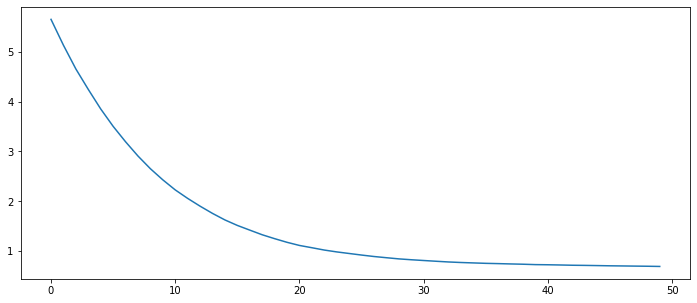

In [41]:
plt.figure(figsize = (12,5))
plt.plot(cv_results['test-rmse-mean'])
plt.show()

### 8) Testing of Models

In [42]:
model_list = []

In [43]:
#1. Fitting a simple Linear regression model and predicting using the test data
regr = linear_model.LinearRegression() 

regr.fit(data[["motor_torque"]], data[["windmill_generated_power"]])

ypred = regr.predict(df_2[["motor_torque"]])

In [44]:
#checking the scores on the test data
from sklearn.metrics import r2_score ,mean_squared_error, mean_absolute_error               
r2 = r2_score(data_test['windmill_generated_power'],ypred)
rmse = np.sqrt(mean_squared_error(data_test['windmill_generated_power'],ypred))
mae = np.sqrt(mean_absolute_error(data_test['windmill_generated_power'],ypred))
print(r2,rmse,mae)
model_list.append(["Simple Linear Regeression",r2,rmse,mae])


0.2468776243815305 2.3099760133546123 1.3576806489177733


In [45]:
feat_names_fs

['motor_torque',
 'generator_temperature',
 'area_temperature',
 'engine_temperature',
 'blade_breadth',
 'speed_wind',
 'atmospheric_pressure',
 'atmospheric_temperature']

In [46]:
#2. Fitting a multiple Linear regression model in features obtained by forward selection and predicting using the test data
regr.fit(df_1.loc[:,feat_names_fs], df_1[["windmill_generated_power"]])

ypred = regr.predict(df_2.loc[:,feat_names_fs])

In [47]:
#checking the scores on the test data
from sklearn.metrics import r2_score ,mean_squared_error, mean_absolute_error               
r2 = r2_score(df_2['windmill_generated_power'],ypred)
rmse = np.sqrt(mean_squared_error(df_2['windmill_generated_power'],ypred))
mae = np.sqrt(mean_absolute_error(df_2['windmill_generated_power'],ypred))
print(r2,rmse,mae)
model_list.append(["Multiple Linear Regeression(Forward Selection)",r2,rmse,mae])

0.420837589344749 2.025698835064761 1.2449238644599878


In [48]:
feat_names_be

['motor_torque',
 'generator_temperature',
 'area_temperature',
 'engine_temperature',
 'speed_wind',
 'atmospheric_temperature',
 'cloud_level_Low',
 'cloud_level_Medium']

In [49]:
#3. Fitting a multiple Linear regression model in features obtained by backward elemination and predicting using the test data
regr.fit(df_1.loc[:,feat_names_be], df_1[["windmill_generated_power"]])

ypred = regr.predict(df_2.loc[:,feat_names_be])

In [50]:
#checking the scores on the test data
from sklearn.metrics import r2_score ,mean_squared_error, mean_absolute_error               
r2 = r2_score(df_2['windmill_generated_power'],ypred)
rmse = np.sqrt(mean_squared_error(df_2['windmill_generated_power'],ypred))
mae = np.sqrt(mean_absolute_error(df_2['windmill_generated_power'],ypred))
print(r2,rmse,mae)
model_list.append(["Multiple Linear Regeression(Backward Elimination)",r2,rmse,mae])

0.4232204620756713 2.021527330119317 1.24482320974879


In [51]:
#4. Fitting a Decision Tree model on features predicting using the test data
ypred = Decision_tree.predict(df_2.loc[:,l])   #predicting using the decision tree model


In [52]:
#checking the scores on the test data
from sklearn.metrics import r2_score ,mean_squared_error               
r2 = r2_score(df_2['windmill_generated_power'],ypred)
rmse = np.sqrt(mean_squared_error(df_2['windmill_generated_power'],ypred))
mae = np.sqrt(mean_absolute_error(df_2['windmill_generated_power'],ypred))
print(r2,rmse,mae)
model_list.append(["Decision Tree",r2,rmse,mae])

0.9438099567195476 0.6309637051483058 0.6031106345415194


In [53]:
#5. Fitting a Bagging model on features predicting using the test data
ypred = baggedModel.predict(df_2.loc[:,l])   #predicting using the decision tree model


In [54]:
#checking the scores on the test data
from sklearn.metrics import r2_score ,mean_squared_error               
r2 = r2_score(df_2['windmill_generated_power'],ypred)
rmse = np.sqrt(mean_squared_error(df_2['windmill_generated_power'],ypred))
mae = np.sqrt(mean_absolute_error(df_2['windmill_generated_power'],ypred))
print(r2,rmse,mae)
model_list.append(["Bagging Model",r2,rmse,mae])

0.9599875571415455 0.5324419045661781 0.555189679362281


In [55]:
#6. Fitting a Random Forest model on features predicting using the test data
randomForest = ensemble.RandomForestRegressor(n_estimators=96, max_features=0.3, oob_score=True)        
randomForest.fit(df_1.iloc[:,1:],df_1.windmill_generated_power) 

ypred = randomForest.predict(df_2.loc[:,l])   #predicting using the decision tree model


In [56]:
#checking the scores on the test data
from sklearn.metrics import r2_score ,mean_squared_error              
r2 = r2_score(df_2['windmill_generated_power'],ypred)
rmse = np.sqrt(mean_squared_error(df_2['windmill_generated_power'],ypred))
mae = np.sqrt(mean_absolute_error(df_2['windmill_generated_power'],ypred))
print(r2,rmse,mae)
model_list.append(["Random Forest",r2,rmse,mae])

0.9615723098309972 0.5217913015938992 0.5567966898865326


In [57]:
#7. Fitting a XGBoost model on features predicting using the test data
xg_reg.fit(df_1.iloc[:,1:],df_1.windmill_generated_power)

ypred = xg_reg.predict(df_2.iloc[:,1:])

In [58]:
#checking the scores on the test data
from sklearn.metrics import r2_score ,mean_squared_error               
r2 = r2_score(df_2['windmill_generated_power'],ypred)
rmse = np.sqrt(mean_squared_error(df_2['windmill_generated_power'],ypred))
mae = np.sqrt(mean_absolute_error(df_2['windmill_generated_power'],ypred))
print(r2,rmse,mae)
model_list.append(["XGBoost Model",r2,rmse,mae])

0.9577102844355526 0.5473839722702424 0.5801880948658454


In [59]:
#printing the results in a dataframe
result_df = pd.DataFrame(model_list, columns = ["Model Name","R2","RMSE","MAE"])  #conerting the list to pandas dataframe
result_df

,Model Name,R2,RMSE,MAE
0,Simple Linear Regeression,0.246878,2.309976,1.357681
1,Multiple Linear Regeression(Forward Selection),0.420838,2.025699,1.244924
2,Multiple Linear Regeression(Backward Elimination),0.423220,2.021527,1.244823
3,Decision Tree,0.943810,0.630964,0.603111
4,Bagging Model,0.959988,0.532442,0.555190
5,Random Forest,0.961572,0.521791,0.556797
6,XGBoost Model,0.957710,0.547384,0.580188


### 1. Which model(s) do you think would be most appropriate and why?
According to our assumption Random forest model will be the best performing model in this case because there is very less correlation between the predictors and target variables which suggets relationship between target variable and predictors is not linear in coefficients. This can be further validated by less value of R-square(0.44) for the Multiple Linear Regression model. When relationship between target variable and predictor is not completely linear the Decision Tree based algorithm performs much better. This can be validated by high value of R-square for Decision Tree model. The Random Forest is an enssemble model which uses multiple fully grown Decision Tree and aggregates output of all trees. Due to this the Random Forest model is very low bias and has less varience than a single Decision Tree. It chooses subset of features which does not suffer from the highly correlated Decision Trees like Bagging model. Hence we think that the Random Forest will be the most appropriate model for this dataset. XGBoost with good hyperparameter tuning may outperform the Random Forest model.
 

### 2. List several models and experiment to see which one performs the best.
We have fitted the following models on the cleaned data and evaluateed the perforfamnce of each model using cross validation and hyperparameter tuning :
1. Simple Linear Regression with each indivisual feature
2. Multiple linear regression by forward sellection and backward elimination
3. Decision tree with hyperparameter tuning
4. Bagging Regressor model
5. Random Forest regressor moodel with hyperparameter tuning.
6. XGBoost Regressor model.

### 3. Validate your hypothesis in (1). Your initial hypothesis may be incorrect but thats okay. Proceed as you think.
After fitting the above listed models on the cleaned dataset, we see that Random Forest model with tuned hyperparameters is  the best performing model. As we did not know hyperparameter tuning for XGBoost model, Random Forest is performing the best among all the listed models.

### 4. Identify the model that performs the best and try to answer why it performed that well.
When we test our models using test dataset, the Simple linear Regression model has very poor R-square value of 0.246878, which improves a lot when we adopt to MLR(8 features(Forward Selection and Backward Elimination)) we get better value for R-square 0.423220.We then go for a decision tree model by selecting the best hyperparameters using cross validation and get R-square of 0.943810. This further improves to 0.0.959988 for a bagged Decision tree model. We then test it for a optimised hyperparameters Random Forest model which gives us a R-square of 0.961572(best of all). We then try fitting a XGBoost model it gives us a R-square of 0.957710.  
As the relationship between target variable and predictors is not linear in coefficients decision tree models are performing better than other linear models.

Hence, the Random Forest regression model is the most accurate model we have here. It is also well generalized model as we are not seeing any drastic change in R-square value during training and testing. 